In [2]:
#IMPORT LIBRAIRIES
##OS
import time
from sqlalchemy import create_engine
##Dieu
import pandas as pd
##Calculation
import numpy as np
from scipy import stats
from sklearn import linear_model 
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# from sklearn import svm
# #Graph
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
#Dash
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

In [3]:
# Function
start_time = time.time()
def importdata(x, link, table):
    
    print("Reading data..")
    col = x.split()
    start_time = time.time()
    df = pd.read_csv(link, encoding="UTF-8")
    df.columns = col
    print("Done.")
    df.to_sql(table, con = engine, if_exists='append', index=False)
    return print("-- Loading time : %s secondes. --" % (time.time() - start_time))

# Brief Régression Logistique
La régression logistique consiste à prédire des variables binaires et non à prédire des variables continues.

## 1. Réaliser une veille sur la régression logistique (vous pouvez vous aider du tutoriel)

## [My benchmarking SGBDR](https://github.com/ejhb/audit/blob/master/2020/11-november/16-linear/audit/introduction_r%C3%A9gression_logistique.pdf)

In [4]:
df.head()

NameError: name 'df' is not defined

## 2. Récupérer les données CSV

In [19]:
df = pd.read_csv('./data/csvclientel.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## 3. Après avoir analysé et pré-traité les données, charger celles-ci dans une base de données relationnelle MySQL (Python, Pandas).

In [20]:
df2 = pd.read_csv('./data/csvclientel.csv')
df2['Gender_Bool'] = df2['Gender'].replace({'Male':0, 'Female':1})
df2.to_csv('./data/csvclientel2.csv',index=False)
df2

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Bool
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,1
3,15603246,Female,27,57000,0,1
4,15804002,Male,19,76000,0,0
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1
396,15706071,Male,51,23000,1,0
397,15654296,Female,50,20000,1,1
398,15755018,Male,36,33000,0,0


## 4. Utiliser un jupyter-notebook pour le travail qui suit.

#### CREATION DATABASE
```
CREATE DATABASE apple;
USE netflix_db;
```
FOR LOADING DATA :

-- This settings must be on

-- show global variables like 'local_infile';

-- set global local_infile=true;

-- SET GLOBAL local_infile = 1;

-- Then to load file you must connect with :
```
sudo mysql --local-infile=1 -u root
``` 
CREATION TABLE
```
DROP TABLE IF EXISTS client;
CREATE TABLE client(
`User ID` INT  PRIMARY KEY NOT NULL
,Gender VARCHAR(10)
,Age INT NOT NULL
,EstimatedSalary INT NOT NULL
,Purchased BOOLEAN NOT NULL
,Gender_Bool BOOLEAN NOT NULL
)
; 
```

#### LOADING
```
LOAD DATA LOCAL INFILE '/home/joshua/Documents/git-workspace/audit/2020/11-november/16-linear/data/csvclientel2.csv'
INTO TABLE client
FIELDS TERMINATED BY ',' 
IGNORE 1 LINES;
```

In [5]:
engine = create_engine("mysql+pymysql://root@localhost/apple")
df = pd.read_sql_table('client',engine)

## 5. Visualiser et analyser les données avec les librairies Matplotlib et Seaborn.

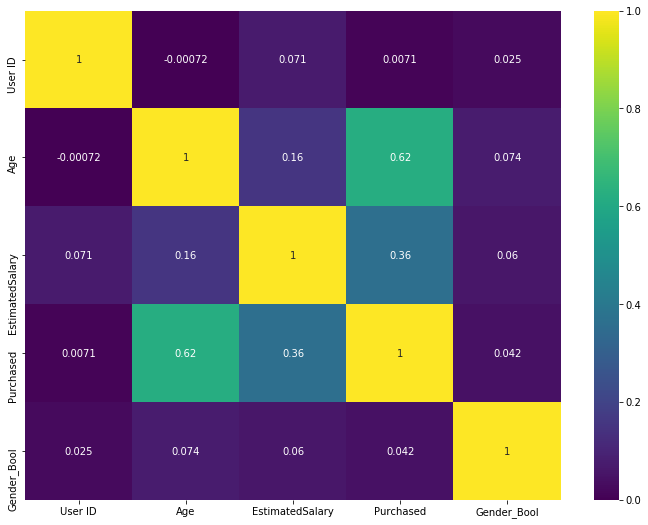

In [8]:
df.to_numpy()
fig_dims = (12,9)
fig , ax =plt.subplots(figsize = fig_dims)
sns.heatmap(df.corr(), annot=True, cbar = True, cmap ='viridis')

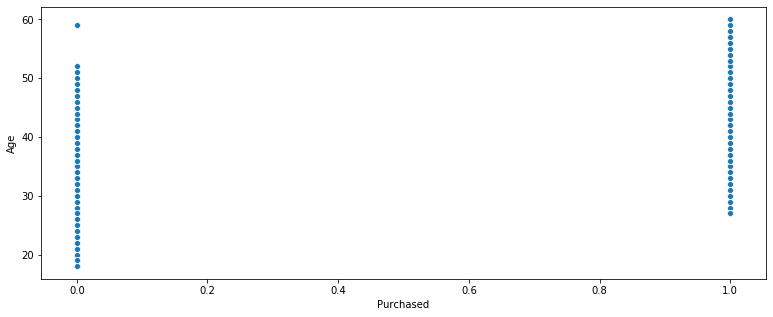

In [12]:
x = df['Purchased']
y = df['Age']

fig_dims = (13,5)
fig , ax =plt.subplots(figsize = fig_dims)
sns.scatterplot(x=x,y=y,ax=ax)

In [ ]:
## 8. Rendre accessible votre notebook via Github.